In [3]:
import scipy.io, os
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from fastjmd95 import rho
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set()
sns.set()

from mpl_toolkits.axes_grid1.inset_locator import inset_axes        
import matplotlib as mpl

colours=sns.color_palette('colorblind', 10)
my_cmap = ListedColormap(colours)

color_list=colours

In [4]:
conda install seaborn


/ 
Note: you may need to restart the kernel to use updated packages.


## Code to plot the meridional overturning and density structure from the North Atlantic

Data used are from the ECCOv4 State Estimate available: https://ecco-group.org/products-ECCO-V4r4.html

The plot below features the North Atlantic basin, but the data includes the Southern Ocean and the arctic, with only the Indian and Pacific basins removed. 

The plot can be adjusted latitudinally, and data to plot the Indian and Pacific ocean are available.


Initially we load the required data:

In [5]:
gridInfo=np.load('latLonDepthLevelECCOv4.npz')
zLev=gridInfo['depthLevel'][:]
depthPlot=zLev.cumsum()
lat=gridInfo['lat'][:]
lon=gridInfo['lon'][:]

dens=np.load('density20yr.npy')

masks=np.load('regimeMasks.npz')
maskMD=masks['maskMD']
maskSSV=masks['maskSSV']
maskNSV=masks['maskNSV']
maskTR=masks['maskTR']
maskSO=masks['maskSO']
maskNL=masks['maskNL']


PSI_A=np.load('PSI_atlantic.npz')
PSI_MD_A=PSI_A['PSI_MD_A']
PSI_TR_A=PSI_A['PSI_TR_A']
PSI_SSV_A=PSI_A['PSI_SSV_A']
PSI_NSV_A=PSI_A['PSI_NSV_A']
PSI_SO_A=PSI_A['PSI_SO_A']
PSI_NL_A=PSI_A['PSI_NL_A']
PSI_all_A=PSI_A['PSI_all_A']

FileNotFoundError: [Errno 2] No such file or directory: 'latLonDepthLevelECCOv4.npz'

### Define the functions needed to plot the data


In [5]:

levs=[32,33,34, 34.5, 35, 35.5,36,36.5,37,37.25,37.5,37.75,38]
cols=plt.cm.viridis([300,250, 200,150, 125, 100, 50,30, 10,15,10,9,1])
Land=np.ones(np.nansum(PSI_all_A, axis=0).shape)*np.nan
Land[np.nansum(PSI_all_A, axis=0)==0.0]=0
land3D=np.ones(dens.shape)
land3D[dens==0]=np.nan

def zPlotSurf(ax, data,zMin, zMax,label,mm,latMin,latMax,RGB,Ticks,saveName='test'):
    land=np.ones(np.nanmean(data, axis=0).shape)*np.nan
    land[np.nansum(data, axis=0)==0.0]=0
    n=50
    levels = np.linspace(-20, 20, n+1)
    ax.contourf(lat[0,latMin:latMax],-depthPlot[zMin:zMax],-np.nanmean(data, axis=0)[zMin:zMax,latMin:latMax], levels=np.linspace(-20, 20, n+1),cmap=plt.cm.seismic, extend='both')

    n2=30  
    densityPlot=np.nanmean((dens*land3D*mm), axis=2)
    assert(len(levs)==len(cols))
    CS=ax.contour(lat[0,latMin:latMax],-depthPlot[zMin:zMax],densityPlot[zMin:zMax,latMin:latMax],
                  levels=levs,
                  linewidths=3,colors=cols, extend='both')

    ax.tick_params(axis='y', labelsize=20)
    if Ticks == 0:
        ax.set_xticklabels( () )
    elif Ticks == 1:
        ax.set_xticklabels( () )
        ax.set_yticklabels( () )
    ax.contourf(lat[0,latMin:latMax],-depthPlot[zMin:zMax],land[zMin:zMax,latMin:latMax], 1,cmap=plt.cm.Set2)
    ax.contourf(lat[0,latMin:latMax],-depthPlot[zMin:zMax],Land[zMin:zMax,latMin:latMax], 50,cmap=plt.cm.bone)

    yL=ax.get_ylim()
    xL=ax.get_xlim()
    plt.text(xL[0]+0.02*np.ptp(xL), yL[0]+0.4*np.ptp(yL), label, fontsize=20, size=30, 
             weight='bold', bbox={'facecolor':'white', 'alpha':0.7}, va='bottom')
    
    
def zPlotDepth(ax, data,zMin, zMax,label,mm,latMin,latMax,RGB,Ticks,saveName='test'):
    land=np.ones(np.nanmean(data, axis=0).shape)*np.nan
    land[np.nansum(data, axis=0)==0.0]=0
    n=50
    levels = np.linspace(-20, 20, n+1)
    ax.contourf(lat[0,latMin:latMax],-depthPlot[zMin:zMax],-np.nanmean(data, axis=0)[zMin:zMax,latMin:latMax], levels=np.linspace(-20, 20, n+1),cmap=plt.cm.seismic, extend='both')
    n2=30
    densityPlot=np.nanmean((dens*land3D*mm), axis=2)
    ax.contour(lat[0,latMin:latMax],-depthPlot[zMin:zMax],densityPlot[zMin:zMax,latMin:latMax], colors=cols,
               levels=levs,
               linewidths=3, extend='both')

    if Ticks == 0:
        ax.tick_params(axis='y', labelsize=20)
        #ax.set_xticklabels( () )
    elif Ticks== 1:
        #ax.set_xticklabels( () )
        ax.set_yticklabels( () )
    plt.tick_params(axis='both', labelsize=20)
    #plt.clim(cmin, cmax)
    
    ax.contourf(lat[0,latMin:latMax],-depthPlot[zMin:zMax],land[zMin:zMax,latMin:latMax], 1,cmap=plt.cm.Set2)
    ax.contourf(lat[0,latMin:latMax],-depthPlot[zMin:zMax],Land[zMin:zMax,latMin:latMax], 50,cmap=plt.cm.bone)
    yL=ax.get_ylim()
    xL=ax.get_xlim()
    plt.text(xL[0]+0.03*np.ptp(xL), yL[0]+0.03*np.ptp(yL), label, fontsize=20, size=30, 
             weight='bold', bbox={'facecolor':RGB, 'alpha':1}, va='bottom')
    


The figure is a composite of different subplots, calling the different functions to plot the surface and the deep.

/home/maike/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
/home/maike/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/home/maike/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:237: UserWarning: Use the colorbar set_ticks() method instead.


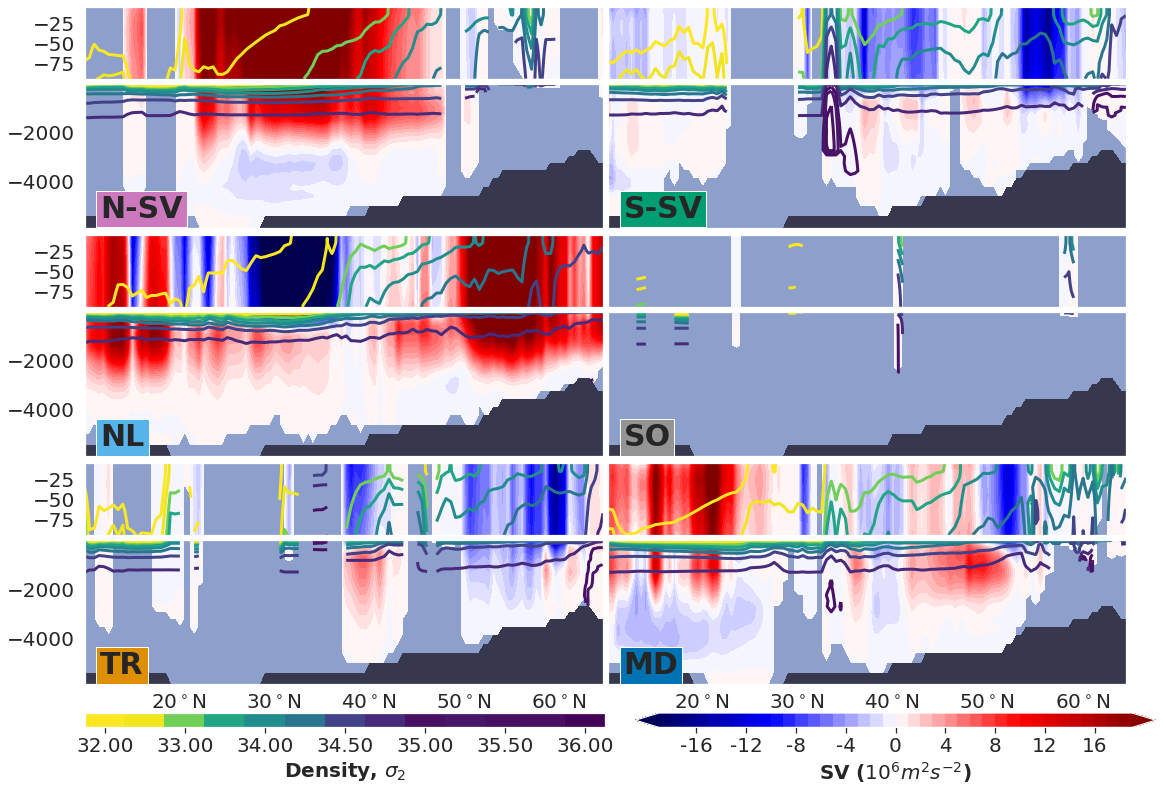

In [6]:
# Set general figure options

# figure layout
xs = 15.5     # figure width in inches
nx = 2       # number of axes in x dimension
ny = 3     # number of sub-figures in y dimension (each sub-figure has two axes)
nya = 2    # number of axes per sub-figure
idy = [2.0, 1.0] # size of the figures in the y dimension
xm = [0.07, 0.07,0.9, 0.07] # x margins of the figure (left to right)
ym = [1.5] + ny*[0.07, 0.1] + [0.3] # y margins of the figure (bottom to top)

# pre-calculate some things
xcm = np.cumsum(xm) # cumulative margins
ycm = np.cumsum(ym) # cumulative margins
idx  = (xs - np.sum(xm))/nx
idy_off = [0] + idy
ys = np.sum(idy)*ny + np.sum(ym) # size of figure in y dimension

# make the figure!
fig = plt.figure(figsize=(xs, ys))

# loop through sub-figures


ix,iy=0,0


#print(loc[0], loc[1], loc[0] + loc[2], loc[1] + loc[3])
# create the axis
#ax = plt.axes(loc)
for iys in range(nya):
    # (bottom left corner x, bottom left corner y, width, height)
    loc = ((xcm[ix] + (ix*idx))/xs,
           (ycm[nya*iy + iys] + np.sum(idy)*iy+ idy_off[iys])/ys,
           idx/xs,
           idy[iys]/ys)
    #print(loc[0], loc[1], loc[0] + loc[2], loc[1] + loc[3])
    # create the axis
    ax = plt.axes(loc)

    # split between your two figure types
    if iys == 0:
        zPlotDepth(ax, PSI_TR_A,1,50,'TR', maskTR,200, 310, color_list[1],'')
                        # if not the bottom figure remove x ticks
        if iy > 0:
            ax.set_xticks([])
        else:
            xticks = ax.get_xticks()
            ax.set_xticklabels(['{:0.0f}$^\circ$N'.format(xtick) for xtick in xticks])
    elif iys == 1:
        zPlotSurf(ax, PSI_TR_A,0,10,'', maskTR,200, 310, color_list[1],'')
        # remove x ticks
        ax.set_xticks([])  




ix,iy=0,1

#print(loc[0], loc[1], loc[0] + loc[2], loc[1] + loc[3])
# create the axis
#ax = plt.axes(loc)
for iys in range(nya):
    # (bottom left corner x, bottom left corner y, width, height)
    loc = ((xcm[ix] + (ix*idx))/xs,
           (ycm[nya*iy + iys] + np.sum(idy)*iy+ idy_off[iys])/ys,
           idx/xs,
           idy[iys]/ys)
    #print(loc[0], loc[1], loc[0] + loc[2], loc[1] + loc[3])
    # create the axis
    ax = plt.axes(loc)

    # split between your two figure types
    if iys == 0:
        zPlotDepth(ax, PSI_NL_A,1,50,'NL', maskNL,200, 310, color_list[-1],'')
                        # if not the bottom figure remove x ticks
        if iy > 0:
            ax.set_xticks([])
    elif iys == 1:
        zPlotSurf(ax, PSI_NL_A,0,10,'', maskNL,200, 310, color_list[4],'')
        # remove x ticks
        ax.set_xticks([])              
        

        
############### n-SV

ix,iy=0,2

loc = ((xcm[ix] + (ix*idx))/xs,
       (ycm[nya*iy + iys] + np.sum(idy)*iy+ idy_off[iys])/ys,
       idx/xs,
       idy[iys]/ys)

#print(loc[0], loc[1], loc[0] + loc[2], loc[1] + loc[3])
# create the axis
#ax = plt.axes(loc)
for iys in range(nya):
    # (bottom left corner x, bottom left corner y, width, height)
    loc = ((xcm[ix] + (ix*idx))/xs,
           (ycm[nya*iy + iys] + np.sum(idy)*iy+ idy_off[iys])/ys,
           idx/xs,
           idy[iys]/ys)
    #print(loc[0], loc[1], loc[0] + loc[2], loc[1] + loc[3])
    # create the axis
    ax = plt.axes(loc)

    # split between your two figure types
    if iys == 0:
        zPlotDepth(ax, PSI_NSV_A,1,50,'N-SV', maskNSV,200, 310, color_list[4],'')
                        # if not the bottom figure remove x ticks
        if iy > 0:
            ax.set_xticks([])
    elif iys == 1:
        zPlotSurf(ax, PSI_NSV_A,0,10,'', maskNSV,200, 310, color_list[-1],'')
        # remove x ticks
        ax.set_xticks([])         
        
#        
#_______________________________________________________________________
#      S-SV  

ix,iy=1,2

loc = ((xcm[ix] + (ix*idx))/xs,
       (ycm[nya*iy + iys] + np.sum(idy)*iy+ idy_off[iys])/ys,
       idx/xs,
       idy[iys]/ys)

#print(loc[0], loc[1], loc[0] + loc[2], loc[1] + loc[3])
# create the axis
# ax = plt.axes(loc)
for iys in range(nya):
    # (bottom left corner x, bottom left corner y, width, height)
    loc = ((xcm[ix] + (ix*idx))/xs,
           (ycm[nya*iy + iys] + np.sum(idy)*iy+ idy_off[iys])/ys,
           idx/xs,
           idy[iys]/ys)
    #print(loc[0], loc[1], loc[0] + loc[2], loc[1] + loc[3])
    # create the axis
    ax = plt.axes(loc)

    # split between your two figure types
    if iys == 0:
        zPlotDepth(ax, PSI_SSV_A,1,50,'S-SV', maskSSV,200, 310, color_list[2],1,'')
                        # if not the bottom figure remove x ticks
        if iy > 0:
            ax.set_xticks([])
    elif iys == 1:
        zPlotSurf(ax, PSI_SSV_A,0,10,'', maskSSV,200, 310, color_list[-3],1,'')
        # remove x ticks
        ax.set_xticks([])  

        


#%%%%%%%%%%%%%%%%%%%%%%%%% SO
        
ix,iy=1,1

loc = ((xcm[ix] + (ix*idx))/xs,
       (ycm[nya*iy + iys] + np.sum(idy)*iy+ idy_off[iys])/ys,
       idx/xs,
       idy[iys]/ys)

#print(loc[0], loc[1], loc[0] + loc[2], loc[1] + loc[3])
# create the axis
#ax = plt.axes(loc)
for iys in range(nya):
    # (bottom left corner x, bottom left corner y, width, height)
    loc = ((xcm[ix] + (ix*idx))/xs,
           (ycm[nya*iy + iys] + np.sum(idy)*iy+ idy_off[iys])/ys,
           idx/xs,
           idy[iys]/ys)
    #print(loc[0], loc[1], loc[0] + loc[2], loc[1] + loc[3])
    # create the axis
    ax = plt.axes(loc)

    # split between your two figure types
    if iys == 0:
        zPlotDepth(ax, PSI_SO_A,1,50,'SO', maskSO,200, 310, color_list[-3],1,'')
                        # if not the bottom figure remove x ticks
        if iy > 0:
            ax.set_xticks([])
    elif iys == 1:
        zPlotSurf(ax, PSI_SO_A,0,10,'', maskSO,200, 310, color_list[-3],1,'')
        # remove x ticks
        ax.set_xticks([])              
        

#%%%%%%%MD
        
ix,iy=1,0

loc = ((xcm[ix] + (ix*idx))/xs,
       (ycm[nya*iy + iys] + np.sum(idy)*iy+ idy_off[iys])/ys,
       idx/xs,
       idy[iys]/ys)

#print(loc[0], loc[1], loc[0] + loc[2], loc[1] + loc[3])
# create the axis
#ax = plt.axes(loc)
for iys in range(nya):
    # (bottom left corner x, bottom left corner y, width, height)
    loc = ((xcm[ix] + (ix*idx))/xs,
           (ycm[nya*iy + iys] + np.sum(idy)*iy+ idy_off[iys])/ys,
           idx/xs,
           idy[iys]/ys)
    #print(loc[0], loc[1], loc[0] + loc[2], loc[1] + loc[3])
    # create the axis
    ax = plt.axes(loc)

    # split between your two figure types
    if iys == 0:
        zPlotDepth(ax, PSI_MD_A,1,50,'MD', maskMD,200, 310, color_list[0],1,'')
                        # if not the bottom figure remove x ticks
        if iy > 0:
            ax.set_xticks([])
        else:
            xticks = ax.get_xticks()
            ax.set_xticklabels(['{:0.0f}$^\circ$N'.format(xtick) for xtick in xticks])
    elif iys == 1:
        zPlotSurf(ax, PSI_MD_A,0,10,'', maskMD,200, 310, color_list[-3],1,'')
        # remove x ticks
        ax.set_xticks([])              
        




cmap = plt.get_cmap('viridis')
cmap = mpl.colors.ListedColormap(cols)
ncol = len(levs)
axes = plt.axes([(xcm[0])/(xs), (ym[0]-0.6)/ys, (2*idx + xm[1])/(xs*2), (0.2)/ys])
cb = fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(-0.5, ncol - 0.5), cmap=cmap), 
                  cax=axes, orientation='horizontal')
cb.ax.set_xticks(np.arange(ncol))
cb.ax.set_xticklabels(['{:0.2f}'.format(lev) for lev in levs])
cb.ax.tick_params(labelsize=20) 
cb.set_label(label=r'Density, $\sigma_2$',weight='bold', fontsize=20)

cmap = plt.get_cmap('seismic')
ncol = len(cols)
axes = plt.axes([(xcm[2]+2*idx)/(xs*2), (ym[0]-0.6)/ys, (2*idx+xm[3])/(xs*2), (0.2)/ys])
cb = fig.colorbar(plt.cm.ScalarMappable(norm=mpl.colors.Normalize(-20,20), cmap=cmap), 
                  cax=axes, label='title', orientation='horizontal', extend='both',format='%.0f',
                  boundaries=np.linspace(-20, 20, 41))
cb.ax.tick_params(labelsize=20) 
cb.set_label(label=r'SV ($10^{6}m^{2}s^{-2}$)',weight='bold', fontsize=20)
# save as a png
#fig.savefig('psiRho_NAtl_sigma2.png', dpi=200, bbox_inches='tight')

